# Executive Summary<a class="anchor" id="TOP"></a>
## The Problem
* I received a database with data about website visitors, their characteristics, and their decision whether to make a purchase or not.
* Depending on the given data, I was asked to tell, for new visitors, whether a purchase will be made or not.
* I produced my prediction using **supervised learning** techniques.

## My Work
### Exploratory Data Analysis (EDA):

* There are 12 feeatures in total, of which one is an input (tag).
* All features are balanced in terms of mean, median and standard deviation except of two: *target_product_description_length* and *target_product_price*. I applied the 'RobustScaler' on these two features.
* Missing entries for some feature were replaced with the median value of that feature across the entire dataset.
* In terms of tags - there are 3 times more tags with a value of 0 compared to tags with a value of 1.
* I did not find a significant correlation between features.
* Categorical values are arbitrarily encoded with numeric values.

### Modeling and prediction:

* Training set is randomly splitted to 70% training and 30% test.
* The models I tested are
1. KNN Classifier
2. Logistic Regression Classifie
3. Random Forest Classifier
4. Bernoulli Naive Bayes
* For each model I plotted its accuracy metrics as well as a confusion matrix.

* **The model with the highest percentage of accuracy among the models tested is-Random Forest Classifier, with 82% success rate (over the test set)**

* After selecting the model, we applied it to the data without the tags and exported the result to a file.

### Final Conclusion:

#### Future explorations

* The feature *target_product_price_color* is highly biased toward 'red', which suggests that red colored price attracts more activity to the website. We should validate/invalidate this hypothesis (possibly using an A/B testing).
* Similarly, data is biased toward short delivery time.

#### Conclusions

* The success rate of the models I have tested ranges between 75% to 82%, with Random Forest gains the maximal success rate.
* The features that exposed most contribution to the final decision in that model are *age*, *target_product_price*, and *target_product_description_length*, which suggests that more attention should be paid to these, and maybe try to collect more data which is not collected thus far.
* We applied the selected model to the UNSEEN data, and out of 20,000 shows we received that in almost 18% of the times a purchase will be made. A figure that is lower than the figure of the data that was initially provided to us (about 26% of the data of 80,000 instances).

<a class="anchor" id="T.O.C"></a>

<h2> Table of Contents </h2>

* [Library imports](#01)


* [Exploratory Data Analysis](#1)
    * [Continuous Feature Analysis](#11)
    * [Categorical Variable Analysis](#12)
    
    
* [Data Preprocessing](#2)
    * [Dealing with Missing Values](#21)
    * [Encoding](#22)


* [Select and Train a Model](#3)
    * [1 - KNN Classifier](#31)
    * [2 - Logistic Regression Classifie](#32)
    * [3 - Random Forest Classifier](#33)
    * [4 - Bernoulli Naive Bayes](#34)
    * [Comparing the Models for Picking the Best One](#35)


* [Test Data Predictions - Random Forest Classifier](#4)
    * [Random Forest Classifier for Predicting Test Data](#41)


* [Final Conclusion](#5)
  

# Library imports<a class="anchor" id="01"></a>

In [55]:
!pip install scikit-plot

In [56]:
!pip install seaborn

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as skmetric
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

import scikitplot.metrics as splt


#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

# Exploratory Data Analysis <a class="anchor" id="1"></a>

Creating the dataframe through train dataset-


In [58]:
df_train = pd.read_csv("dataset_train.csv",sep="\t") 

In [59]:
df_train.head()

,#viewed_ads,#times_visited_website,#products_in_cart,target_product_price,target_product_price_color,target_product_description_length,timestamp,target_product_category,age,shopper_segment,delivery_time,tag
0,16.0,7.0,8,36,red,91,17:43:06,Video games - fifa 18,25.0,new,1-3 days,1
1,10.0,6.0,6,34,black,157,23:19:06,video games - nba 2k,NaN,new,4-8 days,1
2,9.0,7.0,6,36,red,86,02:46:41,Video games - fifa 19,36.0,new,15+ days,0
3,NaN,6.0,6,32,red,121,08:35:20,video games - tekken,32.0,heavy shopper,4-8 days,1
4,8.0,NaN,8,56,red,85,07:00:45,Clothing - red hat,NaN,heavy shopper,9-14 days,0


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   #viewed_ads                        64089 non-null  float64
 1   #times_visited_website             63859 non-null  float64
 2   #products_in_cart                  80000 non-null  int64  
 3   target_product_price               80000 non-null  int64  
 4   target_product_price_color         80000 non-null  object 
 5   target_product_description_length  80000 non-null  int64  
 6   timestamp                          80000 non-null  object 
 7   target_product_category            80000 non-null  object 
 8   age                                63863 non-null  float64
 9   shopper_segment                    80000 non-null  object 
 10  delivery_time                      80000 non-null  object 
 11  tag                                80000 non-null  int

- 11 input , 1 output column. 
- Float, integer and object types 
- 80.000 rows

In [61]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
#viewed_ads,64089.0,10.006195,2.233081,0.0,8.0,10.0,12.0,18.0
#times_visited_website,63859.0,5.006186,1.584876,0.0,4.0,5.0,6.0,10.0
#products_in_cart,80000.0,6.498737,1.794774,0.0,5.0,7.0,8.0,13.0
target_product_price,80000.0,114.885887,119.794007,21.0,41.0,51.0,106.0,495.0
target_product_description_length,80000.0,103.867325,55.644170,8.0,56.0,104.0,152.0,200.0
age,63863.0,33.770900,6.721509,19.0,29.0,34.0,38.0,60.0
tag,80000.0,0.259337,0.438274,0.0,0.0,0.0,1.0,1.0


- Balanced dataset among input features, difference between mean and median(50%) values are not so high.
- In target_product_price and target_product_description_length standard deviation is too high from the rest.
- Data normalization is required to reduce the effects of outliers.
- RobustScaling approach will be applied in the following section of the code.


Missing value check among all the features-


In [62]:
df_train.isnull().sum()

#viewed_ads                          15911
#times_visited_website               16141
#products_in_cart                        0
target_product_price                     0
target_product_price_color               0
target_product_description_length        0
timestamp                                0
target_product_category                  0
age                                  16137
shopper_segment                          0
delivery_time                            0
tag                                      0
dtype: int64

- There are missing values in the dataset, we need to apply any methods to deal with missing value problem.

Count plot and value counts of tag feature from df_train dataframe-

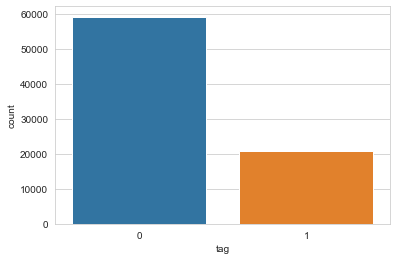

0    59253
1    20747
Name: tag, dtype: int64

In [63]:
sns.countplot(x="tag", data=df_train)
plt.show()

df_train.tag.value_counts()

- Dataset is not balanced in terms of output labels. There are about 3 times more 0 labels than 1.
- The model will bias to predict test samples as 0 more than 1 due to unbalanced target labels.

## Continuous Feature Analysis <a class="anchor" id="11"></a>
* Correlation matrix for numeric features

In [64]:
#https://he.wikipedia.org/wiki/%D7%9E%D7%AA%D7%90%D7%9D_%D7%A1%D7%A4%D7%99%D7%A8%D7%9E%D7%9F

Correlation matrix to see the correlations among features-


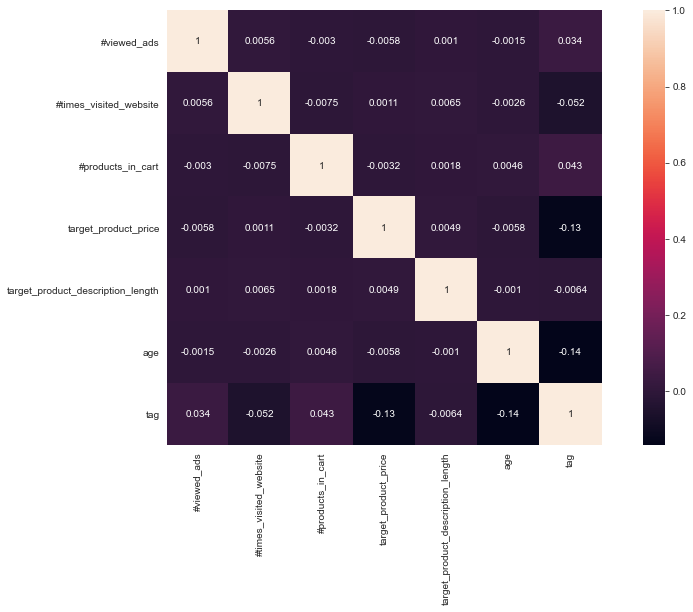

In [65]:
corrmat_spearman = df_train.corr(method='spearman') 
plt.subplots(figsize=(15,8))
sns.heatmap(corrmat_spearman, annot=True, vmax=1, square=True);

- Pearson assumes variables normally distributed.
- Spearman assumes variables are not normally distributed.
- Spearman does not make normality assumption and it can capture non-linear relations also
- In our case, any of the features are correlated, no connection among the features so that they are all important for the models and critical to use them all in modeling section.

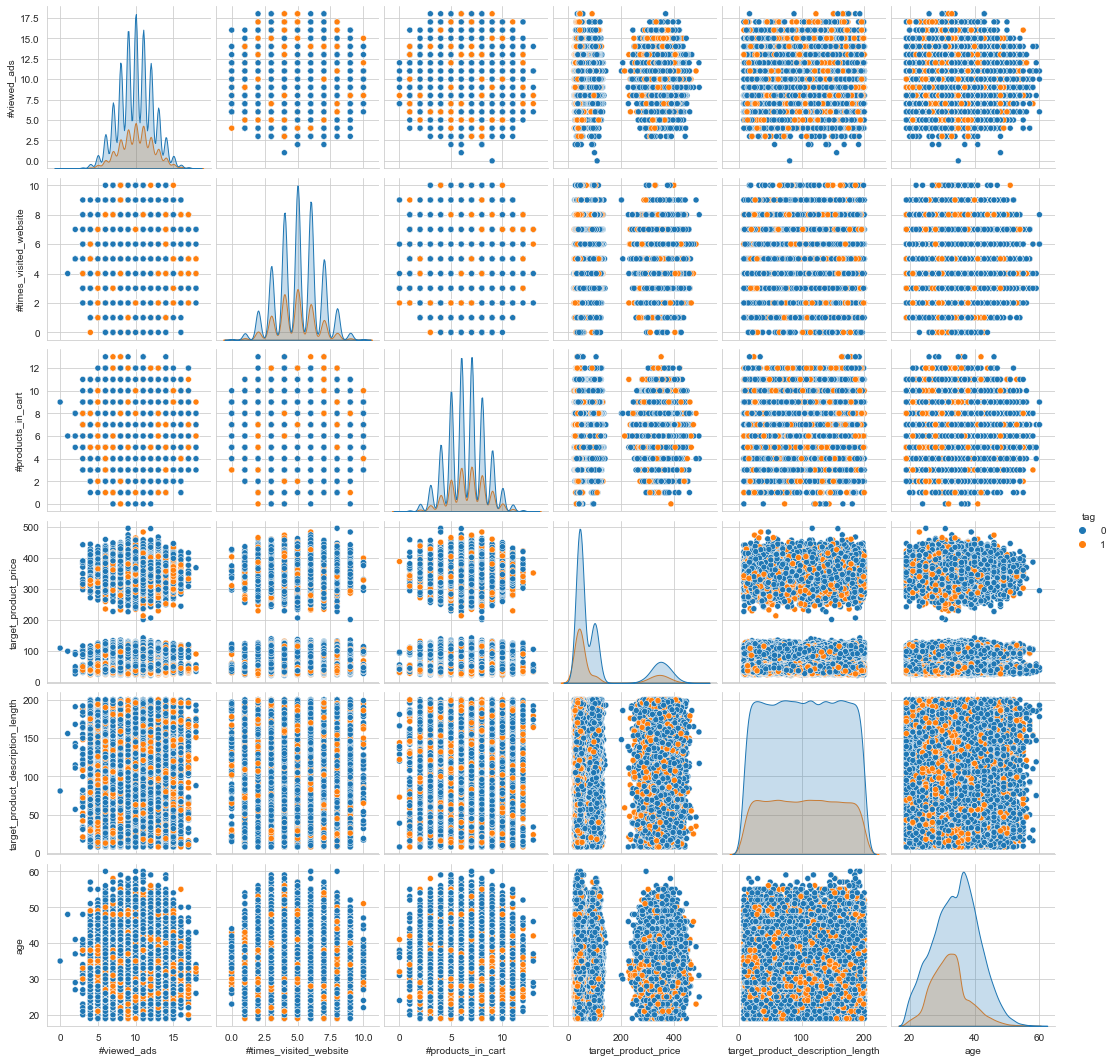

In [66]:
data_temp = df_train[['#viewed_ads','#times_visited_website','#products_in_cart','target_product_price','target_product_description_length','age','tag']]
sns.pairplot(data_temp, hue="tag")
plt.show();

* We cannot identify any format or difference between the data regarding the tags.
* Yes a similar pattern can be detected in tags between 0 and 1 (the difference is only in proportions)

 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

## Categorical Variable Analysis <a class="anchor" id="12"></a>

There are some similar product_category with uppercase and lowercase letters, let's handle that-

In [67]:
df_train['target_product_category'] = df_train['target_product_category'].str.lower()

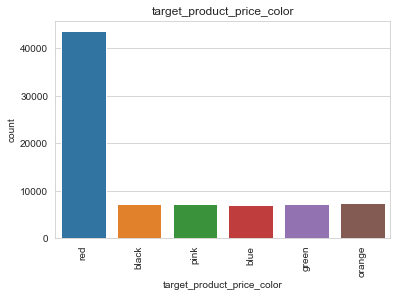

red       43567
orange     7469
green      7320
black      7307
pink       7219
blue       7118
Name: target_product_price_color, dtype: int64




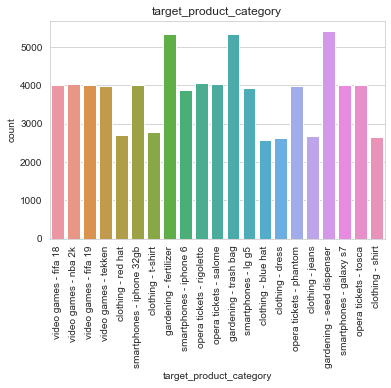

gardening - seed dispenser    5402
gardening - trash bag         5343
gardening - fertilizer        5330
opera tickets - rigoletto     4047
opera tickets - salome        4040
video games - nba 2k          4030
smartphones - galaxy s7       4009
opera tickets - tosca         4009
video games - fifa 18         4008
smartphones - iphone 32gb     4004
video games - fifa 19         3999
opera tickets - phantom       3982
video games - tekken          3976
smartphones - lg g5           3934
smartphones - iphone 6        3877
clothing - t-shirt            2781
clothing - red hat            2690
clothing - jeans              2686
clothing - shirt              2660
clothing - dress              2610
clothing - blue hat           2583
Name: target_product_category, dtype: int64




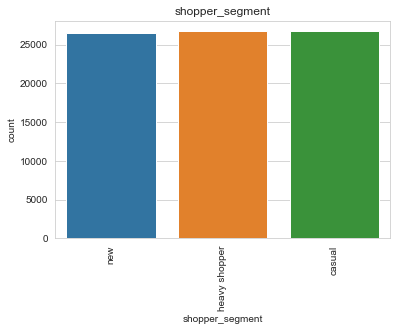

heavy shopper    26727
casual           26715
new              26558
Name: shopper_segment, dtype: int64




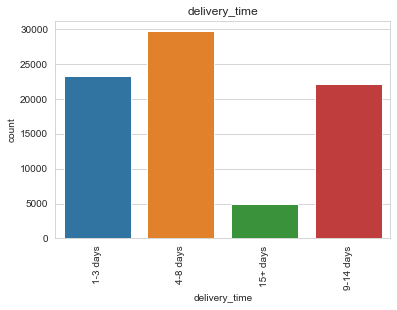

4-8 days     29669
1-3 days     23252
9-14 days    22125
15+ days      4954
Name: delivery_time, dtype: int64




In [68]:
cat_var = ['target_product_price_color','target_product_category','shopper_segment','delivery_time']
for i in cat_var:
    plt.title(i)
    sns.countplot(x=i, data=df_train)
    plt.xticks(rotation=90)
    plt.show()
    print(df_train[i].value_counts())
    print('\n')

**In terms of placement in the shopping cart -**
* The color red leads by a large margin over the rest
* The leading department is the gardening department, which includes products:seed dispenser, trash bag, fertilizer.
* There is no difference in the classification of shopers.
* The category with the least numbered in terms of delivery times is 15+ dayes.

## Conclusions from the data analysis-
1. It can be said that the color red attracts more customer activity, it is advisable to perform A/B tests to test this theory.
2. Delivery times - There is a clear majority for short delivery times, we need to check the contribution of products with long delivery times, and check if they do contribute to profit. If not - we may prefer to put only products with short delivery times.


 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

# Data Preprocessing <a class="anchor" id="2"></a>
* Robust Scaler is used to reduce the effects of outliers in the datasets.
* Robust Scaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.

In [69]:
transformer = RobustScaler()
def scaling(columns):
    return transformer.fit_transform(df_train[columns].values.reshape(-1,1))

columns_to_be_scaled = ["target_product_price","target_product_description_length"]
for i in columns_to_be_scaled:
    df_train[i] = scaling(i)

Statistical description of the scaled dataset-

In [70]:
df_train.describe().T 

,count,mean,std,min,25%,50%,75%,max
#viewed_ads,64089.0,10.006195,2.233081,0.000000,8.000000,10.0,12.000000,18.000000
#times_visited_website,63859.0,5.006186,1.584876,0.000000,4.000000,5.0,6.000000,10.000000
#products_in_cart,80000.0,6.498737,1.794774,0.000000,5.000000,7.0,8.000000,13.000000
target_product_price,80000.0,0.982860,1.842985,-0.461538,-0.153846,0.0,0.846154,6.830769
target_product_description_length,80000.0,-0.001382,0.579627,-1.000000,-0.500000,0.0,0.500000,1.000000
age,63863.0,33.770900,6.721509,19.000000,29.000000,34.0,38.000000,60.000000
tag,80000.0,0.259337,0.438274,0.000000,0.000000,0.0,1.000000,1.000000


- Less standard deviation after scaling.
- Less difference between max and min values after scaling.

## Dealing with Missing Values-<a class="anchor" id="21"></a>

In [71]:
df_train.columns[df_train.isnull().any()]

Index(['#viewed_ads', '#times_visited_website', 'age'], dtype='object')

'#viewed_ads', '#times_visited_website', 'age' are features that contain missing values


Filling missing values with their medians because the values in these columns tend to be distributed normally-

In [72]:
df_train.fillna(df_train.median(),inplace=True)

In [73]:
df_train.isnull().sum()

#viewed_ads                          0
#times_visited_website               0
#products_in_cart                    0
target_product_price                 0
target_product_price_color           0
target_product_description_length    0
timestamp                            0
target_product_category              0
age                                  0
shopper_segment                      0
delivery_time                        0
tag                                  0
dtype: int64

No more missing values.

## Encoding<a class="anchor" id="22"></a>
* target_product_price_color , target_product_category, shopper_segment and delivery_time features are objects.
* One-Hot Encoding, in other words, get_dummies method is applied.
* In the final dataframe, all the columns will be concatenated after dropping the one-hot encoded to prevent overfitting.

In [74]:
df_tpp_color =pd.get_dummies(df_train, columns = ["target_product_price_color"],prefix=["target_product_price_color_is"])
df_tp_category =pd.get_dummies(df_train, columns = ["target_product_category"],prefix=["target_product_category_is"])
df_shopper =pd.get_dummies(df_train, columns = ["shopper_segment"],prefix=["shopper_segment_is"])
df_delivery_time =pd.get_dummies(df_train, columns = ["delivery_time"],prefix=["delivery_time_is"])



df_train = pd.concat([df_train,df_tpp_color,df_tp_category,df_shopper,df_delivery_time], axis=1)
df_train = df_train.loc[:,~df_train.columns.duplicated()]
df_train = df_train.drop(['target_product_price_color', 'target_product_category','shopper_segment', 
                          'delivery_time','timestamp'],axis=1)

In [75]:
df_train.columns

Index(['#viewed_ads', '#times_visited_website', '#products_in_cart',
       'target_product_price', 'target_product_description_length', 'age',
       'tag', 'target_product_price_color_is_black',
       'target_product_price_color_is_blue',
       'target_product_price_color_is_green',
       'target_product_price_color_is_orange',
       'target_product_price_color_is_pink',
       'target_product_price_color_is_red',
       'target_product_category_is_clothing - blue hat',
       'target_product_category_is_clothing - dress',
       'target_product_category_is_clothing - jeans',
       'target_product_category_is_clothing - red hat',
       'target_product_category_is_clothing - shirt',
       'target_product_category_is_clothing - t-shirt',
       'target_product_category_is_gardening - fertilizer',
       'target_product_category_is_gardening - seed dispenser',
       'target_product_category_is_gardening - trash bag',
       'target_product_category_is_opera tickets - phantom',
 

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 41 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   #viewed_ads                                            80000 non-null  float64
 1   #times_visited_website                                 80000 non-null  float64
 2   #products_in_cart                                      80000 non-null  int64  
 3   target_product_price                                   80000 non-null  float64
 4   target_product_description_length                      80000 non-null  float64
 5   age                                                    80000 non-null  float64
 6   tag                                                    80000 non-null  int64  
 7   target_product_price_color_is_black                    80000 non-null  uint8  
 8   target_product_price_color_is_blue            

In [77]:
df_train.head()

,#viewed_ads,#times_visited_website,#products_in_cart,target_product_price,target_product_description_length,age,tag,target_product_price_color_is_black,target_product_price_color_is_blue,target_product_price_color_is_green,...,target_product_category_is_video games - fifa 19,target_product_category_is_video games - nba 2k,target_product_category_is_video games - tekken,shopper_segment_is_casual,shopper_segment_is_heavy shopper,shopper_segment_is_new,delivery_time_is_1-3 days,delivery_time_is_15+ days,delivery_time_is_4-8 days,delivery_time_is_9-14 days
0,16.0,7.0,8,-0.230769,-0.135417,25.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,10.0,6.0,6,-0.261538,0.552083,34.0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,9.0,7.0,6,-0.230769,-0.187500,36.0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,10.0,6.0,6,-0.292308,0.177083,32.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.0,5.0,8,0.076923,-0.197917,34.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

# Select and Train a Model<a class="anchor" id="3"></a>

## Test - Train Split
* Train dataset is split into test-train parts to be able to use in ML algorithms.
* 70% for training and 30% for testing

In [78]:
y=df_train["tag"] #output column
X=df_train.drop(["tag"],axis=1) #training columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42) 

### 1-KNN Classifier<a class="anchor" id="31"></a>
* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

* The following code creates 9 models for each K value from 1 to 9 and show the training and testing accuracies for each K.
* From the figure, we need to choose K value which is not too high and have the highest accuracies for testing and training sets.
* When K gets higher, the model gets more complicated and requires more computational power and time.

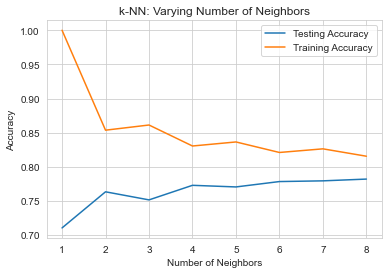

In [79]:
#KNN
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

* 5 or 6 looks good from the figure below according to the accuracies.


Now we apply the cross validation method-
* Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample like our.
* CV is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.<br> That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
* The code will create models by trying K values from 1 to 50 by using Cross Validation method.
* When the K increases, misclassification error reduces,however, we need to choose the elbow point as K value.

<Figure size 432x288 with 0 Axes>

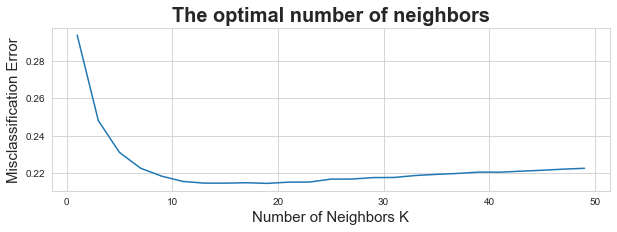

In [80]:
k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(10,3))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show();

* In our figure, K can be chosen as 5 or 6.

In [81]:
knn =KNeighborsClassifier(n_neighbors=5,p=2) #K=5 and p=2 (Minkowski distance)
knn_model = knn.fit(X_train,y_train) # Creating the model
y_pred = knn.predict(X_test) # Calculating the predictions using the model

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     17767
           1       0.59      0.37      0.46      6233

    accuracy                           0.77     24000
   macro avg       0.70      0.64      0.66     24000
weighted avg       0.75      0.77      0.75     24000

AxesSubplot(0.125,0.125;0.62x0.755)


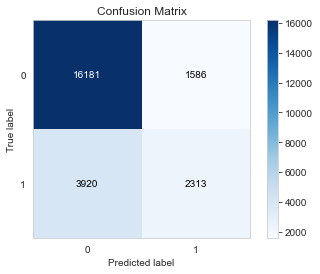

In [82]:
print(classification_report(y_test,y_pred)) #Classification report
print(splt.plot_confusion_matrix(y_test,y_pred)) #Confusion matrix
plt.show();

 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

### 2- Logistic Regression Classifier <a class="anchor" id="32"></a>

In [83]:
log_reg = LogisticRegression(solver = "liblinear")
log_model = log_reg.fit(X_train,y_train) # Creating the model
y_pred_log_reg = log_model.predict(X_test) # Calculating the predictions using the model

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     17767
           1       0.64      0.26      0.37      6233

    accuracy                           0.77     24000
   macro avg       0.71      0.61      0.62     24000
weighted avg       0.75      0.77      0.73     24000

AxesSubplot(0.125,0.125;0.62x0.755)


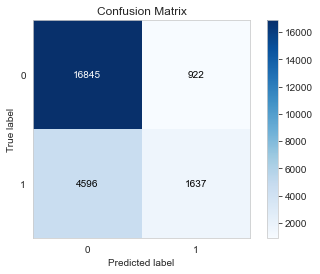

In [84]:
print(classification_report(y_test,y_pred_log_reg)) # Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_log_reg)) # Confusion matrix
plt.show();

Let's prodouce the ROC-

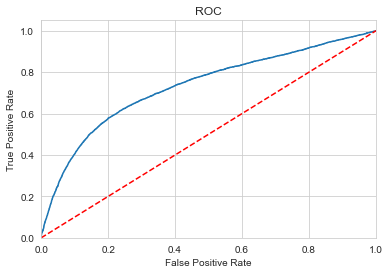

In [85]:
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

* Red line indicates the success that if we didn't create any model, the fundamental success.
* When the area gets higher, it means that our success is getting better and better. (AUC - Area Under Curve)

**Feature Importances-**

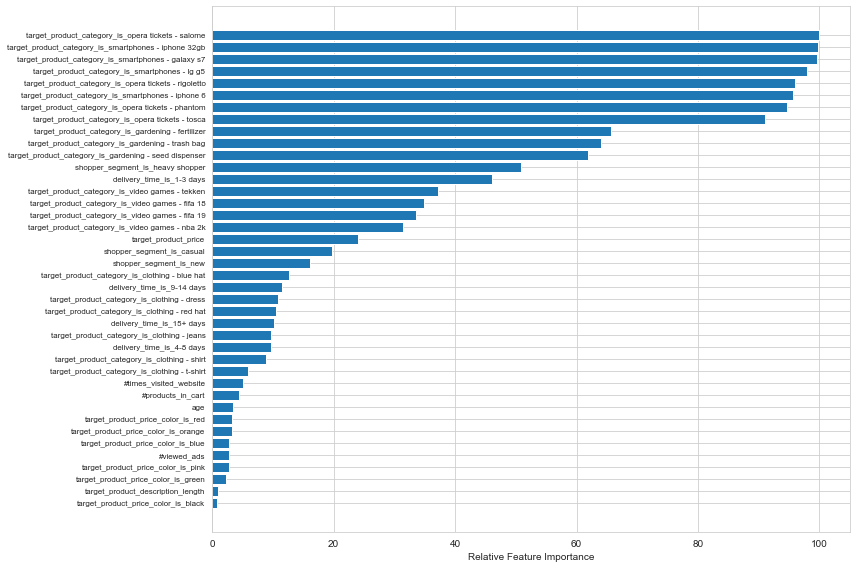

In [86]:
feature_importance = abs(log_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(12, 8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

* Target_product_category columns are the most important for the model.


 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

### 3- Random Forest Classifier <a class="anchor" id="33"></a>
* Random forest is an ensemble machine learning algorithm.
*  A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
* In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.

In [87]:
rf_model_final = RandomForestClassifier() # Object creation
rf_model_final.fit(X_train,y_train) # Fitting the data into the algorithm
y_pred_final = rf_model_final.predict(X_test) # Getting the predictions

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     17767
           1       0.74      0.49      0.59      6233

    accuracy                           0.82     24000
   macro avg       0.79      0.71      0.74     24000
weighted avg       0.81      0.82      0.81     24000

AxesSubplot(0.125,0.125;0.62x0.755)


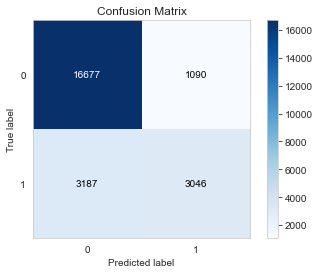

In [88]:
print(classification_report(y_test,y_pred_final)) # Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_final)) # Confusion matrix
plt.show();

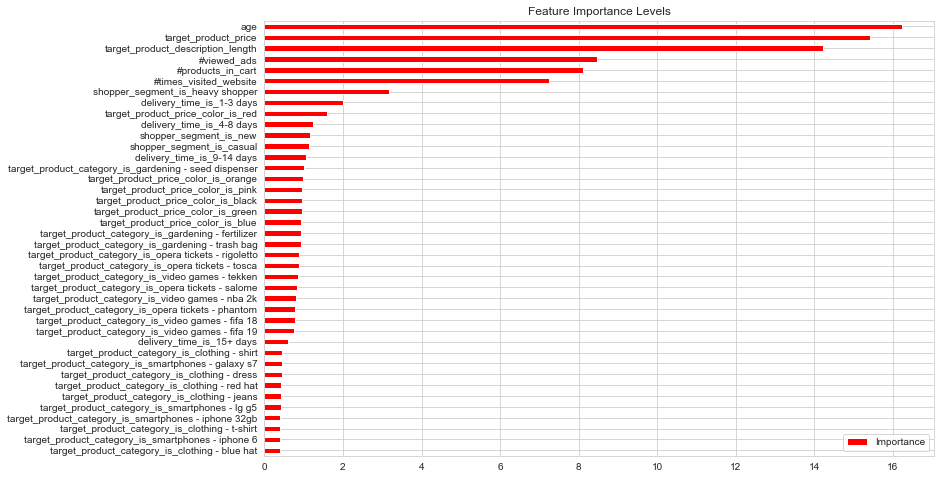

In [89]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind ="barh", color = "r",figsize=(12, 8))
plt.title("Feature Importance Levels");
plt.show()

* age, target_product_price and target_product_description_length features have the highest impact on Random Forest model.


 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

### 4- Bernoulli Naive Bayes <a class="anchor" id="34"></a>
* Bernoulli NB is applied because it's really effective when the output label is binary like in our case.
* Naive Bayes classifier for multivariate Bernoulli models.

In [90]:
nb = BernoulliNB()
nb_model = nb.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     17767
           1       0.56      0.24      0.33      6233

    accuracy                           0.75     24000
   macro avg       0.67      0.59      0.59     24000
weighted avg       0.72      0.75      0.71     24000

AxesSubplot(0.125,0.125;0.62x0.755)


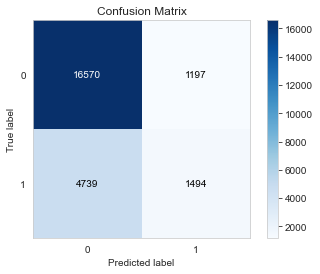

In [91]:
print(classification_report(y_test,y_pred_nb)) # Classification report
print(splt.plot_confusion_matrix(y_test,y_pred_nb)) # Confusion matrix
plt.show();

 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

## Comparing the Models for Picking the Best One <a class="anchor" id="35"></a>

In [92]:
models = [knn_model,log_model,rf_model_final,nb_model]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 77.0583%
----------------------------
LogisticRegression:
Accuracy: 77.0083%
----------------------------
RandomForestClassifier:
Accuracy: 82.1792%
----------------------------
BernoulliNB:
Accuracy: 75.2667%


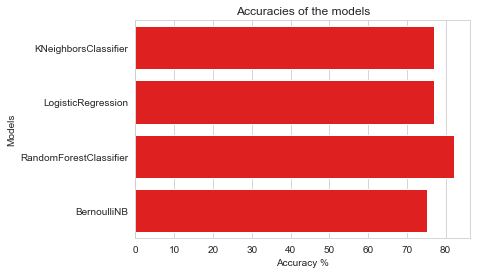

In [93]:
result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracies of the models');

* Random Forest has reached the highest accuracy within the others, 82%

 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

# Test Data Predictions - Random Forest Classifier<a class="anchor" id="4"></a>

In [94]:
df_test = pd.read_csv("dataset_test_no_tags.csv",sep="\t") # Creating the dataframe through test dataset.

In [95]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
#viewed_ads,16004.0,9.996938,2.229433,2.0,8.0,10.0,12.0,18.0
#times_visited_website,15985.0,4.987301,1.574804,0.0,4.0,5.0,6.0,10.0
#products_in_cart,20000.0,6.513350,1.810852,0.0,5.0,7.0,8.0,13.0
target_product_price,20000.0,115.514500,120.586093,21.0,41.0,51.0,106.0,467.0
target_product_description_length,20000.0,104.419550,56.004206,8.0,55.0,105.0,153.0,200.0
age,16048.0,33.793931,6.740614,19.0,29.0,34.0,38.0,61.0


## Data Preprocessing

In [96]:
df_test['target_product_category'] = df_test['target_product_category'].str.lower()

In [97]:
transformer = RobustScaler()
def scaling(columns):
    return transformer.fit_transform(df_test[columns].values.reshape(-1,1))

columns_to_be_scaled = ["target_product_price","target_product_description_length"]
for i in columns_to_be_scaled:
    df_test[i] = scaling(i)

In [98]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
#viewed_ads,16004.0,9.996938,2.229433,2.000000,8.000000,10.0,12.000000,18.000000
#times_visited_website,15985.0,4.987301,1.574804,0.000000,4.000000,5.0,6.000000,10.000000
#products_in_cart,20000.0,6.513350,1.810852,0.000000,5.000000,7.0,8.000000,13.000000
target_product_price,20000.0,0.992531,1.855171,-0.461538,-0.153846,0.0,0.846154,6.400000
target_product_description_length,20000.0,-0.005923,0.571471,-0.989796,-0.510204,0.0,0.489796,0.969388
age,16048.0,33.793931,6.740614,19.000000,29.000000,34.0,38.000000,61.000000


## Dealing with Missing Values

In [99]:
df_test.columns[df_test.isnull().any()]
# '#viewed_ads', '#times_visited_website', 'age' features contain missing values

Index(['#viewed_ads', '#times_visited_website', 'age'], dtype='object')

In [100]:
df_test.fillna(df_train.median(),inplace=True)
# Filling missing values with their medians
df_test.isnull().sum()
# No more missing values

#viewed_ads                          0
#times_visited_website               0
#products_in_cart                    0
target_product_price                 0
target_product_price_color           0
target_product_description_length    0
timestamp                            0
target_product_category              0
age                                  0
shopper_segment                      0
delivery_time                        0
dtype: int64

## Encoding

In [101]:
df_tpp_color =pd.get_dummies(df_test, columns = ["target_product_price_color"],prefix=["target_product_price_color_is"])
df_tp_category =pd.get_dummies(df_test, columns = ["target_product_category"],prefix=["target_product_category_is"])
df_shopper =pd.get_dummies(df_test, columns = ["shopper_segment"],prefix=["shopper_segment_is"])
df_delivery_time =pd.get_dummies(df_test, columns = ["delivery_time"],prefix=["delivery_time_is"])



df_test = pd.concat([df_test,df_tpp_color,df_tp_category,df_shopper,df_delivery_time], axis=1)
df_test = df_test.loc[:,~df_test.columns.duplicated()]
df_test = df_test.drop(['target_product_price_color', 'target_product_category','shopper_segment', 
                          'delivery_time','timestamp'],axis=1)

In [102]:
df_test.head()

,#viewed_ads,#times_visited_website,#products_in_cart,target_product_price,target_product_description_length,age,target_product_price_color_is_black,target_product_price_color_is_blue,target_product_price_color_is_green,target_product_price_color_is_orange,...,target_product_category_is_video games - fifa 19,target_product_category_is_video games - nba 2k,target_product_category_is_video games - tekken,shopper_segment_is_casual,shopper_segment_is_heavy shopper,shopper_segment_is_new,delivery_time_is_1-3 days,delivery_time_is_15+ days,delivery_time_is_4-8 days,delivery_time_is_9-14 days
0,7.0,5.0,9,0.938462,-0.122449,21.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,11.0,4.0,8,-0.092308,-0.846939,26.0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,10.0,4.0,4,-0.046154,0.642857,35.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,10.0,4.0,7,0.830769,0.418367,34.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,10.0,4.0,4,-0.230769,-0.908163,31.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

## Random Forest Classifier for Predicting Test Data <a class="anchor" id="41"></a>

In [103]:
def randomforest_prediction(training_data, target_data, test_data):
    my_model = RandomForestClassifier()
    my_model.fit(training_data, target_data)
    return my_model.predict(test_data)

In [104]:
#df_test.columns.tolist()

In [105]:
#df_test.columns
features = df_test.columns.tolist()

train_y = df_train.tag
train_X = df_train[features]
test_X = df_test[features]

results = {}
test_prediction = randomforest_prediction(train_X, train_y, test_X)
output = pd.DataFrame({'Y(prediction)': test_prediction})
results['scores'] = test_prediction

final_df = pd.DataFrame(output)

In [106]:
final_df.head(15)

,Y(prediction)
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,1


In [107]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y(prediction),20000.0,0.1781,0.382606,0.0,0.0,0.0,0.0,1.0


In [108]:
final_df.to_csv('Prediction.csv', index = False)

 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝

# Final Conclusion-<a class="anchor" id="5"></a>

### Future explorations

* The feature *target_product_price_color* is highly biased toward 'red', which suggests that red colored price attracts more activity to the website. We should validate/invalidate this hypothesis (possibly using an A/B testing).
* Similarly, data is biased toward short delivery time.

### Conclusions

* The success rate of the models I have tested ranges between 75% to 82%, with Random Forest gains the maximal success rate.
* The features that exposed most contribution to the final decision in that model are *age*, *target_product_price*, and *target_product_description_length*, which suggests that more attention should be paid to these, and maybe try to collect more data which is not collected thus far.
* We applied the selected model to the UNSEEN data, and out of 20,000 shows we received that in almost 18% of the times a purchase will be made. A figure that is lower than the figure of the data that was initially provided to us (about 26% of the data of 80,000 instances).

 [Go Up.](#T.O.C)⏫

 [Go TOP.](#TOP)🔝